# MF4056 MF6013 Demo 4 Calibration and simulation of short rate models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng=np.random.default_rng()

## Part 1: Calibrating the Ho-Lee model to the instantaneous forward curve.

Upload the data from Table 1 in Notes Set 4

In [2]:
mat = np.array([0,0.5,1.0,1.5,2.0])
rates = np.array([0,0.02,0.022,0.025,0.03])

def dFac(r,t):
    return np.exp(-r*t)

T = 2.0; N=4; dt=T/N
t = np.arange(0,2+dt,dt)

Compute bond prices and logs thereof

In [3]:
bonds=100*dFac(rates,mat)
logBonds=np.log(bonds)

Use the approximate relation $f(0,T_i)\approx-(\ln(P(0,T_i))-ln(P(0,T_{i-1})))/(T_i-t_{i-1})$ to compute values on the initial instantaneous forward curve.

In [4]:
f=np.ones(len(mat)-1)
for i in range(len(mat)-1):
    f[i]=-(logBonds[i+1]-logBonds[i])/(mat[i+1]-mat[i])

f=np.insert(f,0,0.02)
f

array([0.02 , 0.02 , 0.024, 0.031, 0.045])

Use the values of $f(0,T_i)$, $i=0,\ldots,4$ to generate trajectories on the Ho-Lee model.

In [5]:
M=50
sig=0.015
incd5 = rng.normal(0, np.sqrt(dt), (M,N))
r0=0.01
r=r0*np.ones((M,len(f)))

for i in range(len(f)-1):
    r[:,i+1]=r[:,i]+(f[i+1]-f[i])+0.5*(sig**2)*(t[i+1]**2-t[i]**2)+sig*incd5[:,i]

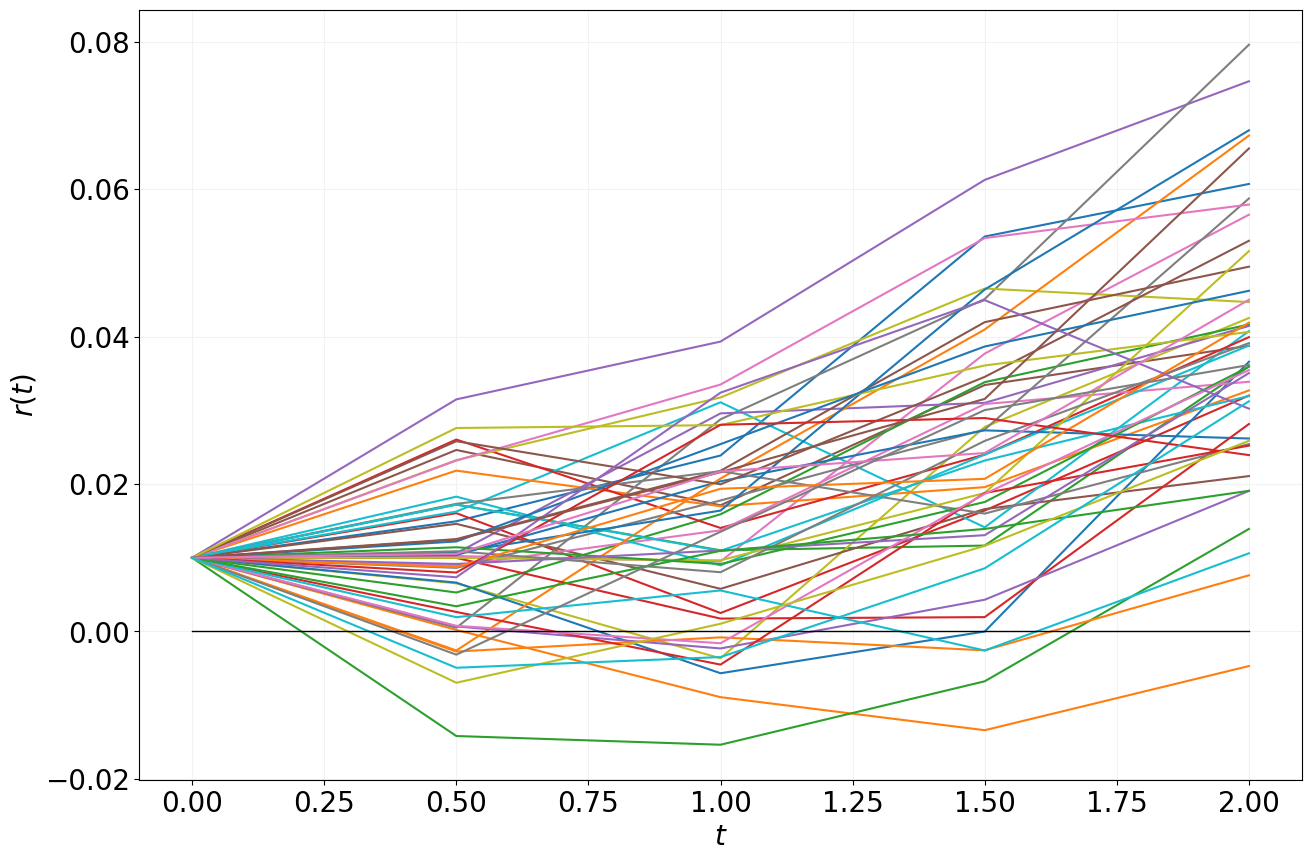

In [6]:
fig, ax1 = plt.subplots(figsize=(15, 10))
plt.grid(axis='both', color='0.95')
plt.xlabel('$t$',fontsize=20)
plt.ylabel('$r(t)$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(t,r.T)
plt.plot(t,np.zeros(len(t)), color='black',linewidth=1.0)

## Part 2: Generating yield curves from the Vasicek model

Set up model parameters

In [7]:
alpha = 0.4; b=0.05; sigma=0.015
T=20; N=2000; dt=T/N;
t=np.linspace(0,T,N+1)

Define Python functions for the mathematical functions $A(\tau)$, $B(\tau)$, and $R(\tau,r_0)$.

In [8]:
def B(tau):
    return (1/alpha)*(1-np.exp(-alpha*(tau)))

def A(tau):
    return (B(tau)-tau)*(b-(sigma**2/2)/alpha**2)-(B(tau)**2)*(sigma**2)/(4*alpha)

def R(tau,rInit):
    return -A(tau)/tau+rInit*B(tau)/tau

Produce arrays containing values of $R(\tau,r_0)$, where $\tau\in[0,T]$, and we separately generate yield curves for each of $r_0=0.01,0.045,0.055,0.07$.

In [9]:
yieldCurve1=np.ones(len(t)-1)

for i in range(1,len(t)-1):
    yieldCurve1[i-1]=R(t[i],0.01)
    
yieldCurve2=np.ones(len(t)-1)

for i in range(1,len(t)-1):
    yieldCurve2[i-1]=R(t[i],0.045)
    
yieldCurve3=np.ones(len(t)-1)

for i in range(1,len(t)-1):
    yieldCurve3[i-1]=R(t[i],0.055)
    
yieldCurve4=np.ones(len(t)-1)

for i in range(1,len(t)-1):
    yieldCurve4[i-1]=R(t[i],0.07)

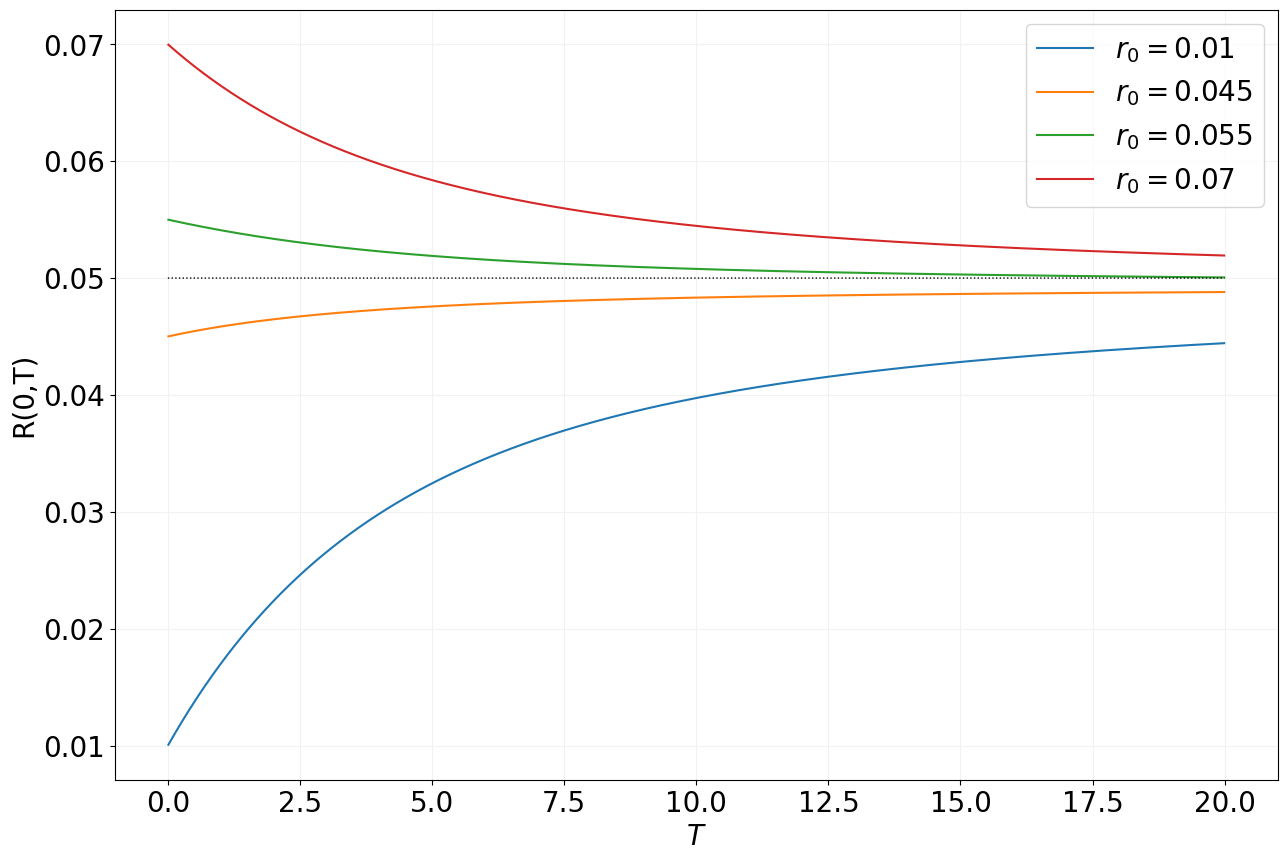

In [10]:
fig, ax1 = plt.subplots(figsize=(15, 10))
plt.grid(axis='both', color='0.95')
plt.xlabel('$T$',fontsize=20)
plt.ylabel('R(0,T)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(t[1:-1],yieldCurve1[:-1])
plt.plot(t[1:-1],yieldCurve2[:-1])
plt.plot(t[1:-1],yieldCurve3[:-1])
plt.plot(t[1:-1],yieldCurve4[:-1])
ax1.legend(['$r_0=0.01$','$r_0=0.045$','$r_0=0.055$','$r_0=0.07$'],fontsize=20)

plt.plot(t,b*np.ones(len(t)), color='black', linestyle='dotted',linewidth=1.0)

In [11]:
lm = 1 #int rate
mu = 1.2 
sig = .3
r0 = 1
dt =1


In [12]:
c = 2*lm/((sig**2)*(1-np.exp(-lm*dt)))

In [13]:
dof = 4*lm*mu/(sig**2)

In [14]:
ncp = 2*c*r0*

SyntaxError: invalid syntax (3606044440.py, line 1)